# Spins.

Here we work with the Hamiltonian $H=-\sum\limits_{i=1}^N S_i\cdot S_{i+1}$, so $J=1$.


Let us write the analytical expression for the Helmholtz free energy in thermodynamic limit in terms of partition function. We know that


\begin{gather*}
\overline{S} =-k_{B}\sum _{\alpha } p_{\alpha }\log p_{\alpha } =k_{B}\sum _{\alpha } p_{\alpha }( \beta E_{\alpha } +\log Z) =\dfrac{\overline{E}}{T} +k_{B}\log Z\Longrightarrow
-k_{B} T\log Z=\overline{E} -T\overline{S}
\end{gather*}


Thermodynamics says that $\displaystyle F=E-TS$, so, the identity $\displaystyle F=-k_{B} T\log Z$ is proven. There must be a mistake in the problem shit, because it says $\displaystyle F=-k_{B}\log Z\ $, which is wrong. 



In [1]:
import numpy as np
import random

N = 12 # the lattice size


def Initial (N): #sampling random <<initial>> state with spin values 1 and -1
    
    M = np.random.randint ( 2 , size = N )
    
    return 2*M-1 


def Energy (State):
    
    E = 0
    
    for i in range (N):
        
        for j in range (N):
            
            E += -1 * State [i] * ( State [(i+1)%N] + State [(i-1)%N])
            
            # Here the << % >> sign provide us with periodic bounday conditions
            
    return E/2 # We return E/2 since every << bond >> belongs to 2 spins, and every spin has 2 neighbours

def Z ( T ):
    
    Z = 0
    
    for i in range (2**N): #the idea is to represent this numbers in binary form to obtain all the possible states
        
        s = f'{i:012b}'  

        State = list(2*int(d)-1 for d in s)
        
        Z += np.exp( - Energy(State) / T )
        
    return Z    



def Entropy (State, T):
    
    #S = -np.log( np.exp( - Energy(State) / T ) / Z (T) )
    
    S =  Energy(State) / T  +  np.log( Z(T) )
    
    return S
    

def Gibbs (State, T): #Samples us Gibbs-distributed state. The alrorythm I use is called Gibbs sampling method 
    
    for n in range (N**3): #The convergence depends on N
    
        i = np.random.randint (N)
        
        dE =  -2 * ( State [(i+1)%N] + State [(i-1)%N] )
        
        p  = 1 / ( 1 + np.exp( dE / T ) )
            
        State[i] = 2 * np.random.binomial( 1 , p ) - 1
        
    return State 

Now we have all the instruments to sample states of our system, distributed by Gibbs PDF.

First of all thermodynamical quantities:

In [2]:
def F_therm (T):
    
    F = 0
    
    K = 100
    
    for i in range (K):
        
        State = Gibbs (Initial (N) , T)
        
        F += Energy(State) - T * Entropy (State, T)
        
    return F/K

Now statistical:

In [3]:
def F_stat (T):
    
    F = -T * np.log( Z(T) )
    
    return F

In [4]:
%matplotlib notebook

from matplotlib import pyplot as plt

In [7]:
Ts = np.linspace ( 1, 50, 64)

Fs = list(F_stat(t) for t in Ts)

Ft = list(F_therm(t) for t in Ts) #this one takes some time

<IPython.core.display.Javascript object>


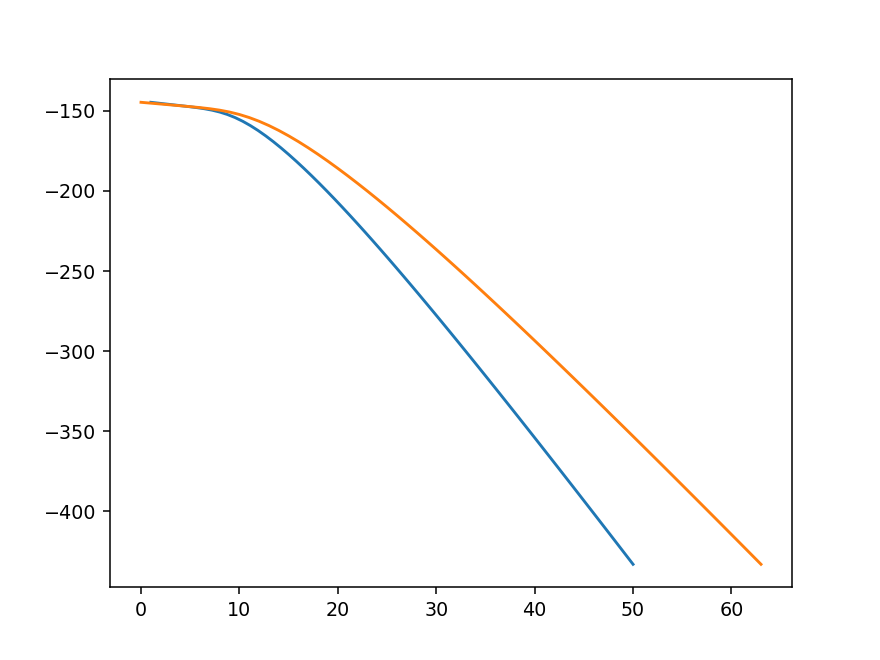

In [8]:
plt.plot(Ts,Fs, Ft)

So, as we can see, $F_{stat}$ and $F_{therm}$ really start to separate on some temperature. My explanation is following:

Let us suppose we deal with a very small $T$. It can happen, for example, that the most typical state of our system is "all the spins down and one is up" or vice versa. There are only $2 N$ ways to perform such a state. If we have a typical state such as "all the spins down and two are up", there are already $N(N-2)$ ways to perform it.

So, the claim is the following: if we have a higher temperature, then we also have a higher amount of microstates, which can perform a required macrostate, and this amount strongly depends on $N$. So, since we have only $12$ spins, we, of course, can't talk about the thermodynamical limit. And since one of our formulae assume it, we must have some $T$, where the dependence on $N$ becomes crucial. 

So, that's it, we have such a $T$.